## Exercise 1 - Bayes classification system
by Aurélien Héritier and Jean Nanchen

In [1]:
# Import some useful libraries

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

## 1a. Getting started with Bayes

a) Read the training data from file ex1-data-train.csv. The first two columns are x1 and x2. The last column holds the class label y.

In [2]:
def read_data(file):
    dataset = pd.read_csv(file, names=['x1','x2','y'])
    print(dataset.head())
    return dataset[["x1", "x2"]], dataset["y"].values

In [3]:
X_train, y_train = read_data("ex1-data-train.csv")

          x1         x2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


In [4]:
# Prepare a function to compute accuracy
def accuracy_score(y_true, y_pred):
    return (y_true == y_pred).sum() / y_true.size

b) Compute the priors of both classes P(C0) and P(C1)

In [5]:
# TODO: Compute the priors
# print(X_train)
print(y_train)
x1_size = len(X_train['x1'])
x2_size = len(X_train['x2'])


P_c0 =  np.sum(y_train)/len(y_train)
P_c1 = 1 - P_c0
print('P(C0) = ', P_c0)
print('P(C1) = ', P_c1)

[0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]
P(C0) =  0.6
P(C1) =  0.4


c) Compute histograms of x1 and x2 for each class (total of 4 histograms). Plot these histograms. Advice : use the numpy `histogram(a, bins="auto")` function.

[34.62365962 30.28671077 35.84740877 60.18259939 79.03273605 45.08327748
 61.10666454 75.02474557 76.0987867  84.43281996 95.86155507 75.01365839
 82.30705337 69.36458876 39.53833914 53.97105215 69.07014406 67.94685548
 70.66150955 76.97878373 67.37202755 89.67677575 50.53478829 34.21206098
 77.92409145 62.27101367 80.19018075 93.1143888  61.83020602 38.7858038
 61.37928945 85.40451939 52.10797973 52.04540477 40.23689374 54.63510555
 33.91550011 64.17698887 74.78925296 34.18364003 83.90239366 51.54772027
 94.44336777 82.36875376 51.04775177 62.22267576 77.19303493 97.77159928
 62.0730638  91.5649745  79.94481794 99.27252693 90.54671411 34.52451385
 50.28649612 49.58667722 97.64563396 32.57720017 74.24869137 71.79646206
 75.39561147 35.28611282 56.2538175  30.05882245 44.66826172 66.56089447
 40.45755098 49.07256322 80.27957401 66.74671857 32.72283304 64.03932042
 72.34649423 60.45788574 58.84095622 99.8278578  47.26426911 50.4581598
 60.45555629 82.22666158 88.91389642 94.83450672 67.3

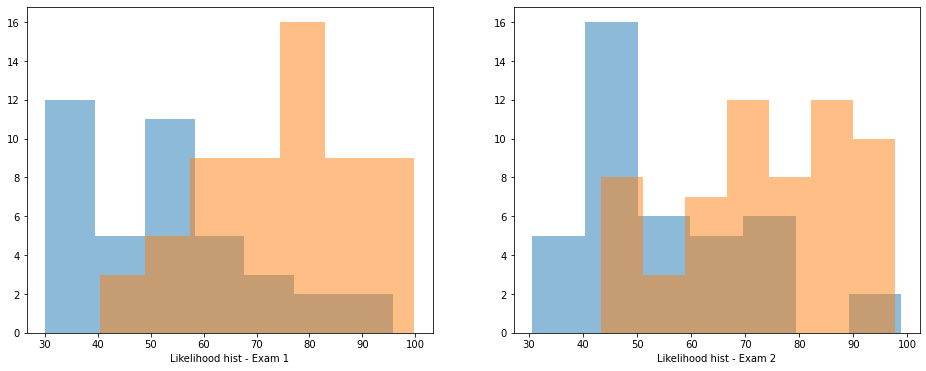

In [6]:
# TODO: Compute histograms



# TODO: plot histograms

plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
print(X_train['x1'].to_numpy())
print(X_train['x2'].to_numpy())
print(y_train)

X1_train_c0 = [x for x in X_train['x1'] if y_train[list(X_train['x1']).index(x)] == 0]
X1_train_c1 = [x for x in X_train['x1'] if y_train[list(X_train['x1']).index(x)] == 1]
X2_train_c0 = [x for x in X_train['x2'] if y_train[list(X_train['x2']).index(x)] == 0]
X2_train_c1 = [x for x in X_train['x2'] if y_train[list(X_train['x2']).index(x)] == 1]

plt.hist(X1_train_c0, bins='auto',alpha=0.5)
plt.hist(X1_train_c1, bins='auto',alpha=0.5)
plt.xlabel('Likelihood hist - Exam 1')

plt.subplot(1, 2, 2)
plt.hist(X2_train_c0, bins='auto',alpha=0.5)
plt.hist(X2_train_c1, bins='auto',alpha=0.5)
plt.xlabel('Likelihood hist - Exam 2')
plt.show()

d) Use the histograms to compute the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). For this define a function `likelihood_hist(x, hist_values, edge_values)` that returns the likelihood of x for a given histogram (defined by its values and bin edges as returned by the numpy `histogram()` function).

In [7]:
def likelihood_hist(x: float, hist_values: np.ndarray, bin_edges: np.ndarray) -> float:
    # TODO: compute likelihoods from histograms outputs

    return hist_values[(find_nearest(bin_edges, x))]/np.sum(hist_values)

def find_nearest(array:np.ndarray, value:float):
    sizeOfArray = array.size
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    if idx >= sizeOfArray-2:
        idx = sizeOfArray-2
    return idx

e) Implement the classification decision according to Bayes rule and compute the overall accuracy of the system on the test set ex1-data-test.csv. :
- using only feature x1
- using only feature x2
- using x1 and x2 making the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck)

In [8]:
X_test, y_test = read_data("ex1-data-test.csv")
print(X_test['x1'].size)

          x1         x2  y
0  39.196334  78.530294  0
1  40.448499  86.839470  1
2  65.571920  44.303497  0
3  79.648113  70.806564  1
4  66.260221  41.672703  0
100


In [9]:
# TODO: predict on test set in the 3 cases described above

y_pred_x1 = [0] * 100
y_pred_x2 = [0] * 100
y_pred_x1x2 = [0] * 100
hist_values_x1_c0 = np.histogram(X1_train_c0, bins="auto")[0]
hist_values_x1_c1 = np.histogram(X1_train_c0, bins="auto")[0]
hist_values_x2_c0 = np.histogram(X2_train_c0, bins="auto")[0]
hist_values_x2_c1 = np.histogram(X2_train_c1, bins="auto")[0]

bin_edges_x1_c0 = np.histogram(X1_train_c0, bins="auto")[1]
bin_edges_x1_c1 = np.histogram(X1_train_c1, bins="auto")[1]
bin_edges_x2_c0 = np.histogram(X2_train_c0, bins="auto")[1]
bin_edges_x2_c1 = np.histogram(X2_train_c1, bins="auto")[1]

likelihood_x1_c0 = [0] * 100
likelihood_x1_c1 = [0] * 100
for x in range (0,len(X1_train_c0)) :
    likelihood_x1_c0[x]=(likelihood_hist(X_test['x1'][x],hist_values_x1_c0,bin_edges_x1_c0))*P_c0
    
for x in range (0,len(X1_train_c1)) :
    likelihood_x1_c1[x]=(likelihood_hist(X_test['x1'][x],hist_values_x1_c1,bin_edges_x1_c1))*P_c1

print('likelihood_x1_c1 : ',likelihood_x1_c1,' length : ',len(likelihood_x1_c1))
print('likelihood_x1_c0 : ',likelihood_x1_c0, ' length : ',len(likelihood_x1_c0)) 
for x in range (0,len(X1_train_c1)) :
    if likelihood_x1_c1[x] >= likelihood_x1_c0[x]:
        y_pred_x1[x]=1
    else:
        y_pred_x1[x]=0

print('y_test :',y_test)
print('y_pred_x1 :',y_pred_x1)

accuracy_score(y_test, y_pred_x1)
print('\n\n')

likelihood_x2_c0 = [0] * 100
likelihood_x2_c1 = [0] * 100
likelihood_x1x2_c0 = [0] * 100
likelihood_x1x2_c1 = [0] * 100
for x in range (0,len(X2_train_c0)) :
    likelihood_x2_c0[x]=(likelihood_hist(X_test['x2'][x],hist_values_x2_c0,bin_edges_x2_c0))*P_c0
    
for x in range (0,len(X2_train_c1)) :
    likelihood_x2_c1[x]=(likelihood_hist(X_test['x2'][x],hist_values_x2_c1,bin_edges_x2_c1))*P_c1

print('likelihood_x2_c1 : ',likelihood_x2_c1,' length : ',len(likelihood_x2_c1))
print('likelihood_x2_c0 : ',likelihood_x2_c0, ' length : ',len(likelihood_x2_c0)) 
for x in range (0,len(X2_train_c1)) :
    if likelihood_x2_c1[x] >= likelihood_x2_c0[x]:
        y_pred_x2[x]=1
    else:
        y_pred_x2[x]=0

print('y_test :',y_test)
print('y_pred_x2 :',y_pred_x2)

accuracy_score(y_test, y_pred_x2)
print('\n\n')


likelihood_x1x2_c0 = np.array(likelihood_x1_c0) * np.array(likelihood_x2_c0)
likelihood_x1x2_c1 = np.array(likelihood_x1_c1) * np.array(likelihood_x2_c1)

for x in range (0,len(likelihood_x1x2_c0)) :
    if likelihood_x1x2_c1[x] >= likelihood_x1x2_c0[x]:
        y_pred_x1x2[x]=1
    else:
        y_pred_x1x2[x]=0
print('y_test :',y_test)
print('y_pred_x1x2 :',y_pred_x1x2)
accuracy_score(y_test, y_pred_x1x2)

likelihood_x1_c1 :  [0.12, 0.12, 0.05, 0.020000000000000004, 0.05, 0.020000000000000004, 0.12, 0.020000000000000004, 0.05, 0.12, 0.05, 0.05, 0.05, 0.020000000000000004, 0.05, 0.03, 0.12, 0.12, 0.11000000000000001, 0.12, 0.05, 0.11000000000000001, 0.020000000000000004, 0.03, 0.12, 0.03, 0.12, 0.020000000000000004, 0.11000000000000001, 0.03, 0.11000000000000001, 0.020000000000000004, 0.12, 0.03, 0.05, 0.03, 0.12, 0.11000000000000001, 0.05, 0.020000000000000004, 0.12, 0.03, 0.12, 0.12, 0.05, 0.03, 0.12, 0.05, 0.05, 0.03, 0.05, 0.03, 0.12, 0.05, 0.05, 0.020000000000000004, 0.05, 0.05, 0.05, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  length :  100
likelihood_x1_c0 :  [0.075, 0.075, 0.045, 0.03, 0.045, 0.03, 0.18, 0.03, 0.165, 0.075, 0.165, 0.045, 0.045, 0.03, 0.045, 0.03, 0.18, 0.075, 0.075, 0.075, 0.045, 0.075, 0.03, 0.045, 0.18, 0.03, 0.18, 0.03, 0.075, 0.03, 0.075, 0.03, 0.18, 0.03, 0.165, 0.03, 0.18, 0.0

0.6

Which system is the best ?

The system with the two likelihood; 0.53 with X1, 0.59 with x2 & 0.6 with x1x2

## 1b. Bayes - Univariate Gaussian distribution

Do the same as in a) but this time using univariate Gaussian distribution to model the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). You may use the numpy functions `mean()` and `var()` to compute the mean μ and variance σ2 of the distribution. To model the likelihood of both features, you may also do the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck).


In [10]:
def likelihood_univariate_gaussian(x: float, mean: float, var: float) -> float:
    # TODO: compute likelihoods from histograms outputs

    return ...

In [11]:
# TODO: Compute mean and variance for each classes and each features (8 values)



In [12]:
# TODO: predict on test set in the 3 cases

y_pred = []

...

accuracy_score(y_test, y_pred)

<ipython-input-4-7f2069170e0b>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return (y_true == y_pred).sum() / y_true.size


AttributeError: 'bool' object has no attribute 'sum'